## **Binary Classification SVM**

In [2]:
"""
Binary SVM ka basic kaam ye hota hai ke do classes (+1 aur -1) ko best
possible straight line (hyperplane) ke zariye separate kare.

Step 1: Labels
    Binary classification me sirf 2 classes hoti hain:
        Example:
            Cat → -1
            Dog → +1

Ye +1 aur -1 SVM ke mathematical constraints ke liye zaroori hote hain.


Step 2: Features
- Har data point ke paas multiple features hote hain:
    [weight, height, color_encoded, ...]

- SVM in features ko N-dimensional vector space me treat karta hai.


Step 3: Hyperplane (Line/Plane)
- SVM ka goal hota hai ek hyperplane find karna:
    w1*x1 + w2*x2 + ... + wn*xn + b = 0

- Ye hyperplane classes ko separate karta hai.

Step 4: Margin
- Margin wo distance hota hai jo hyperplane aur closest points (support vectors)
  ke darmiyan hota hai.

Margin = 2 / ||w||

- SVM iss distance ko maximize karta hai taake classification robust ho.


Step 5: Training / Weight Optimization
    - SVM randomly weights start karta hai.
    - Har data point ke liye condition check hoti hai:
        y * (w • x + b) ≥ 1

Agar condition fail hoti hai to:
    - Weights update hotay hain
    - Hyperplane shift hota hai
    - Margin better hota jata hai

End result:
    Best hyperplane mil jati hai + maximum margin achieved.


Step 6: Prediction Rule
    - Naye data point ke liye score nikala jata hai:
        score = w • x + b

Prediction:
    score > 0 → +1 class (Dog)
    score < 0 → -1 class (Cat)
    score = 0 → boundary (rare) → prediction = +1 (positive class)


Step 7: Why SVM draws a line?
  - Line draw karna zaroori hai taake:
    1. Model clear boundary create kare
    2. Future predictions consistent hon
    3. Maximum separation ho classes ka

  - Line pure tarah weight values + labels ki base par banti hai.


Step 8: Support Vectors
    - Sirf wo points jo hyperplane ke sabse paas hote hain learning ko affect karte hain.
    - Baaki points almost irrelevant hote hain.

Is wajah se SVM:
    - Robust hota hai
    - Memory efficient hota hai


Step 9: Feature Scaling & Categorical Data
   - SVM distance-based algorithm hai, isliye:
        1) Numeric features → StandardScaler REQUIRED
        2) Categorical features → One-Hot Encoding REQUIRED
        3) One-hot ke baad scaling REQUIRED

Step 10: Summary Flow
    1. Data collect
    2. Categorical → One-hot encode
    3. Numeric + one-hot → Standard scale
    4. SVM weights initialize
    5. Optimize → maximum margin + constraints satisfied
    6. Best hyperplane choose
    7. Prediction = sign(w • x + b)


Binary SVM Final Summary (Urdu)
    - SVM ek linear classifier hai jo maximum margin hyperplane banata hai.
    - Hyperplane features ke weights aur class labels ki base par banta hai.
    - Support vectors hi learning ke main points hote hain.
    - Prediction ke liye SVM sign(w • x + b) use karta hai.
    - Scaling + One-hot encoding SVM ke liye bohot important hoti hai.
"""

'\nBinary SVM ka basic kaam ye hota hai ke do classes (+1 aur -1) ko best\npossible straight line (hyperplane) ke zariye separate kare.\n\nStep 1: Labels\n    Binary classification me sirf 2 classes hoti hain:\n        Example:\n            Cat → -1\n            Dog → +1\n\nYe +1 aur -1 SVM ke mathematical constraints ke liye zaroori hote hain.\n\n\nStep 2: Features\n- Har data point ke paas multiple features hote hain:\n    [weight, height, color_encoded, ...]\n\n- SVM in features ko N-dimensional vector space me treat karta hai.\n\n\nStep 3: Hyperplane (Line/Plane)\n- SVM ka goal hota hai ek hyperplane find karna:\n    w1*x1 + w2*x2 + ... + wn*xn + b = 0\n\n- Ye hyperplane classes ko separate karta hai.\n\nStep 4: Margin\n- Margin wo distance hota hai jo hyperplane aur closest points (support vectors)\n  ke darmiyan hota hai.\n\nMargin = 2 / ||w||\n\n- SVM iss distance ko maximize karta hai taake classification robust ho.\n\n\nStep 5: Training / Weight Optimization\n    - SVM randoml

In [3]:
from sklearn.datasets import make_blobs  # for fake clustered data
from sklearn.svm import SVC 
import matplotlib.pyplot as plt

In [4]:
# make_blobs generates 2D points for binary classification
# n_samples=50 -> total 50 points
# centers=2 -> two classes (0 and 1)
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

In [5]:
# kernel="linear" -> we want a linear hyperplane (decision boundary)
# C=1 -> regularization parameter (small C allows some mistakes, large C tries to avoid mistakes)
# Default kernel for SVC is "rbf" if not specified
model = SVC(kernel="linear", C=1)
model.fit(X, y)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [11]:
scores = model.decision_function(X)
print(scores)

[ 3.08033954 -3.23108049  3.57564087 -2.44664218 -2.79236031  2.92411243
 -2.30687001  1.00025104  3.4440936  -3.34264926 -1.38187058  3.36592389
  3.23458039 -3.381565   -2.5270864  -1.61410753  3.28817221 -2.2799498
 -1.21143805  2.22688229  1.91696635 -1.69243374 -2.46827776  3.66245991
 -0.9997476  -3.39871558 -1.15113763 -3.38523255  2.27089538  0.99949625
 -1.40791814 -3.56321688  2.94462996 -1.65758844 -2.99338092 -1.98140839
  2.95619251  3.23658247  1.8766393   2.86573498  2.31129114 -2.52448134
 -3.99982175  1.45016669  3.20202099  2.60195828  1.77331958  4.06518875
  2.74903344 -2.40128765]


In [7]:
print(X)

[[  6.45519089  -9.46356669]
 [  8.49142837  -2.54974889]
 [  6.87151089 -10.18071547]
 [  9.49649411  -3.7902975 ]
 [  7.67619643  -2.82620437]
 [  6.3883927   -9.25691447]
 [  9.24223825  -3.88003098]
 [  5.95313618  -6.82945967]
 [  6.86866543 -10.02289012]
 [  7.52132141  -2.12266605]
 [  7.29573215  -4.39392379]
 [  6.85086785  -9.92422452]
 [  4.29225906  -8.99220442]
 [  8.21597398  -2.28672255]
 [  7.9683312   -3.23125265]
 [  8.68185687  -4.53683537]
 [  6.77811308  -9.80940478]
 [  7.93333064  -3.51553205]
 [  7.73046665  -4.72901672]
 [  7.37578372  -8.7241701 ]
 [  6.95292352  -8.22624269]
 [  8.07502382  -4.25949569]
 [  7.39169472  -3.1266933 ]
 [  6.59823581 -10.20150177]
 [  7.27059007  -4.84225716]
 [  8.71445065  -2.41730491]
 [  5.73005848  -4.19481136]
 [  9.42169269  -2.6476988 ]
 [  6.26221548  -8.43925752]
 [  7.89359985  -7.41655113]
 [  8.98426675  -4.87449712]
 [ 10.48848359  -2.75858164]
 [  5.45644482  -8.99900075]
 [  6.50072722  -3.82403586]
 [  7.07705089

In [8]:
model.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

Weights-> [-0.25395113 -0.83807751]
Bias-> -3.211559897362612
X-axis points for line: [np.float64(4.292259064350665), np.float64(10.488483585983852)]
Y-axis points for line: [np.float64(-5.132680281219741), np.float64(-7.010237162398519)]


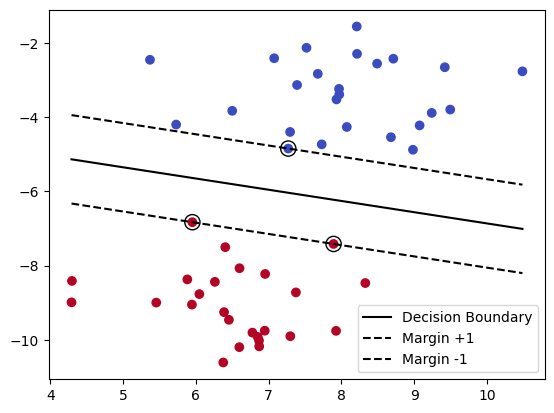

In [9]:
# X[:, 0] -> first feature (plotted on x-axis)
# X[:, 1] -> second feature (plotted on y-axis)
# c=y -> color points according to their class (0 or 1)
# cmap="coolwarm" -> color map for better visualization
plt.scatter(X[:, 0], X[:,1], c=y, cmap="coolwarm") 

# For linear SVM, decision boundary equation is:
# w0*x0 + w1*x1 + b = 0
w = model.coef_[0]      # weights [w0, w1] for each feature
print("Weights->",w)
b = model.intercept_[0] # bias (y-intercept of hyperplane)
print("Bias->",b)


# x_line: take minimum and maximum x0 values to plot a straight line
x_line = [min(X[:,0]), max(X[:, 0])]
print("X-axis points for line:", x_line)

# y_line: solve the hyperplane equation for x1 (y-axis)
# x1 = (-w0*x0 - b)/w1
# Why we use x1 as y-axis? Because in a 2D plot we need x and y coordinates.
# x0 -> horizontal axis, x1 -> vertical axis
y_line = [(-w[0]*x - b)/w[1] for x in x_line]
print("Y-axis points for line:", y_line)

# Plot the decision boundary
plt.plot(x_line, y_line, "k-", label="Decision Boundary")

# Margins are at distance 1 from the hyperplane in feature space
# Equation for margins: w0*x0 + w1*x1 + b = ±1
y_up = [(-w[0]*x - b + 1)/w[1] for x in x_line]   # margin +1
y_down = [(-w[0]*x - b - 1)/w[1] for x in x_line] # margin -1
plt.plot(x_line, y_up, "k--", label="Margin +1")  
plt.plot(x_line, y_down, "k--", label="Margin -1") 

# 7. Highlight support vectors
# model.support_vectors_ -> points closest to the hyperplane that define the margin
# s=120 -> marker size
# facecolors="none" -> empty inside
# edgecolors="black" -> black border
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s=120, facecolors="none", edgecolors="black")
plt.legend()
plt.show()

In [10]:
"""
After training the SVM gives you the equation of the line
w1x1 + w2x2 + b = 0

Decision Boundary ==> w1x + w2y + b = 0   --> y = (-w1x - b)/w2
Margin Lines 
Upper Margin: w0x + w1y + b = +1  --> y = (-w0x - b + 1) / w1
Lower Margin: w0x + w1y + b = -1  --> y = (-w0x - b - 1) / w1
"""

'\nAfter training the SVM gives you the equation of the line\nw1x1 + w2x2 + b = 0\n\nDecision Boundary ==> w1x + w2y + b = 0   --> y = (-w1x - b)/w2\nMargin Lines \nUpper Margin: w0x + w1y + b = +1  --> y = (-w0x - b + 1) / w1\nLower Margin: w0x + w1y + b = -1  --> y = (-w0x - b - 1) / w1\n'